In [8]:
import numpy as np
import math
import pandas as pd
from scipy.optimize import fmin_tnc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random

In [9]:
df = pd.read_csv("AdmissionDataset/data.csv")

In [10]:
def train_validate_split(df,test_size):
    if isinstance(test_size,float):
        test_size = round(test_size*len(df))
        
    indices=df.index.tolist()
    validate_indices = random.sample(population=indices,k=test_size)
    
    validate_df=df.loc[validate_indices]
    train_df=df.drop(validate_indices)
    return train_df,validate_df

In [11]:
train_df,validate_df=train_validate_split(df,0.2)


In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

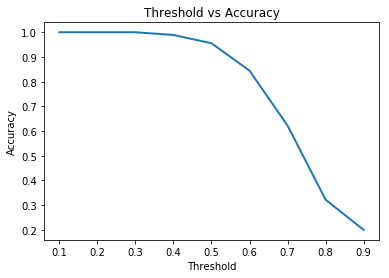

In [14]:
data=train_df

initial_theta = [0,0]
alpha = 0.1
iterations = 1000

X = data.iloc[:,1:-1]
y = data.iloc[:, -1]

X=(X-np.mean(X))/np.std(X)

X_validate=validate_df.iloc[:,1:-1]
X_validate=(X_validate-np.mean(X))/np.std(X)

X_validate=np.c_[np.ones((X_validate.shape[0], 1)), X_validate]

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

theta = np.zeros((X.shape[1], 1))

z=np.dot(X,theta)

h = sigmoid(z)

for i in range(1000):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    lr = 0.01
    theta -= lr * gradient
    z = np.dot(X, theta)
    h = sigmoid(z)

accuracy=[]
threshold=[]
for q in range(9):
    thrshld=(q+1)*(.1)
    threshold.append(thrshld)
    prdctn=sigmoid(np.dot(X_validate,theta))
    t_p=0
    t_n=0
    f_n=0
    f_p=0
    for i in range(len(prdctn)):
    #       print(y[i],prdctn[i])
        if y[i]>=(thrshld):
            if prdctn[i]>=(thrshld):
                t_p+=1
            else:
                f_n+=1
        else:
            if prdctn[i]<(thrshld):
                t_n+=1
            else:
                f_p+=1
    total=t_p+t_n+f_n+f_p
    acurcy=(t_n+t_p)/total
    accuracy.append(acurcy)
#     print("Accuracy :",((t_p+t_n)/total))

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.plot(threshold, accuracy, linewidth=2.0)